<a href="https://colab.research.google.com/github/kamarshahein/Epsilon/blob/main/project_movies_the_final__Copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libreraies

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import string

#Plots
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
movies = pd.read_csv('/content/netflix_titles.csv')

movies.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
columns = movies.columns
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="most_frequent")
X = movies.values
X = imputer.fit_transform(X)
movies = pd.DataFrame(X)
movies.columns = columns
movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Rajiv Chilaka,David Attenborough,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Rajiv Chilaka,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
movies.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

## **Cleaning data**

In [ ]:
movies.shape

(8807, 12)

In [ ]:
movies.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [ ]:
movies.describe()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,8807,8807,8807,8807,8807,8807,8807,8807,8807
unique,8807,2,8807,4528,7692,748,1767,74,17,220,514,8775
top,s2468,Movie,The Florida Project,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",2018,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,2653,844,3649,119,1147,3211,1796,362,4


In [ ]:
#numbers of years
print(movies['release_year'].min())
print(movies['release_year'].max())

1925
2021


In [ ]:
#names of columns
movies.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
#drop columns that we do not need
df_movies = movies.drop(['show_id','director', 'cast','rating', 'date_added', 'description'], axis = 1) 
df_movies.head(10)

,type,title,country,release_year,duration,listed_in
0,Movie,Dick Johnson Is Dead,United States,2020,90 min,Documentaries
1,TV Show,Blood & Water,South Africa,2021,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,United States,2021,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,United States,2021,1 Season,"Docuseries, Reality TV"
4,TV Show,Kota Factory,India,2021,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
5,TV Show,Midnight Mass,United States,2021,1 Season,"TV Dramas, TV Horror, TV Mysteries"
6,Movie,My Little Pony: A New Generation,United States,2021,91 min,Children & Family Movies
7,Movie,Sankofa,"United States, Ghana, Burkina Faso, United Kin...",1993,125 min,"Dramas, Independent Movies, International Movies"
8,TV Show,The Great British Baking Show,United Kingdom,2021,9 Seasons,"British TV Shows, Reality TV"
9,Movie,The Starling,United States,2021,104 min,"Comedies, Dramas"


In [ ]:
#rename column(listed_in)to (category) 
df = df_movies.rename(columns={'listed_in':'category'})
df

,type,title,country,release_year,duration,category
0,Movie,Dick Johnson Is Dead,United States,2020,90 min,Documentaries
1,TV Show,Blood & Water,South Africa,2021,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,United States,2021,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,United States,2021,1 Season,"Docuseries, Reality TV"
4,TV Show,Kota Factory,India,2021,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...,...
8802,Movie,Zodiac,United States,2007,158 min,"Cult Movies, Dramas, Thrillers"
8803,TV Show,Zombie Dumb,United States,2018,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies"
8804,Movie,Zombieland,United States,2009,88 min,"Comedies, Horror Movies"
8805,Movie,Zoom,United States,2006,88 min,"Children & Family Movies, Comedies"


In [ ]:
#remove rows with null values
df.dropna(inplace = True)
df.isnull().sum()
df.shape

(8807, 6)

In [ ]:
a=df[df['category']=="Documentaries"]

In [ ]:
a

,type,title,country,release_year,duration,category
0,Movie,Dick Johnson Is Dead,United States,2020,90 min,Documentaries
45,Movie,My Heroes Were Cowboys,United States,2021,23 min,Documentaries
117,Movie,Final Account,"United Kingdom, United States",2021,94 min,Documentaries
221,Movie,"Bob Ross: Happy Accidents, Betrayal & Greed",United States,2021,93 min,Documentaries
304,Movie,Lady Boss: The Jackie Collins Story,United Kingdom,2021,97 min,Documentaries
...,...,...,...,...,...,...
8723,Movie,What Makes a Psychopath?,United Kingdom,2017,52 min,Documentaries
8737,Movie,Why Are We Getting So Fat?,United Kingdom,2016,50 min,Documentaries
8738,Movie,Why Knot,"Canada, India, Thailand, United States, United...",2016,84 min,Documentaries
8739,Movie,Why We Fight: The Battle of Russia,United States,1943,82 min,Documentaries


In [ ]:
b=df[df['category']=="Dramas"]

In [ ]:
b

,type,title,country,release_year,duration,category
112,Movie,Worth,United States,2021,119 min,Dramas
129,Movie,An Unfinished Life,"Germany, United States",2005,108 min,Dramas
142,Movie,Freedom Writers,"Germany, United States",2007,124 min,Dramas
162,Movie,Marshall,"United States, China, Hong Kong",2017,118 min,Dramas
329,Movie,Catch Me If You Can,"United States, Canada",2002,142 min,Dramas
...,...,...,...,...,...,...
8674,Movie,Viceroy's House,"United Kingdom, India, Sweden",2017,106 min,Dramas
8675,Movie,Victor,United States,2015,110 min,Dramas
8685,Movie,VS.,United Kingdom,2018,99 min,Dramas
8691,Movie,Wakefield,United States,2016,109 min,Dramas


In [ ]:
df['category'] = df['category'].str.replace('&',',')
df

,type,title,country,release_year,duration,category
0,Movie,Dick Johnson Is Dead,United States,2020,90 min,Documentaries
1,TV Show,Blood & Water,South Africa,2021,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,United States,2021,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,United States,2021,1 Season,"Docuseries, Reality TV"
4,TV Show,Kota Factory,India,2021,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...,...
8802,Movie,Zodiac,United States,2007,158 min,"Cult Movies, Dramas, Thrillers"
8803,TV Show,Zombie Dumb,United States,2018,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies"
8804,Movie,Zombieland,United States,2009,88 min,"Comedies, Horror Movies"
8805,Movie,Zoom,United States,2006,88 min,"Children , Family Movies, Comedies"


In [ ]:
new_data = df["category"].str.split(",", n = 5, expand = True)
new_data

,0,1,2,3,4,5
0,Documentaries,None,None,None,None,None
1,International TV Shows,TV Dramas,TV Mysteries,None,None,None
2,Crime TV Shows,International TV Shows,TV Action,Adventure,None,None
3,Docuseries,Reality TV,None,None,None,None
4,International TV Shows,Romantic TV Shows,TV Comedies,None,None,None
...,...,...,...,...,...,...
8802,Cult Movies,Dramas,Thrillers,None,None,None
8803,Kids' TV,Korean TV Shows,TV Comedies,None,None,None
8804,Comedies,Horror Movies,None,None,None,None
8805,Children,Family Movies,Comedies,None,None,None


In [ ]:
new_data1=df.merge(new_data, left_index=True, right_index = True)
new_data1.head()

,type,title,country,release_year,duration,category,0,1,2,3,4,5
0,Movie,Dick Johnson Is Dead,United States,2020,90 min,Documentaries,Documentaries,None,None,None,None,None
1,TV Show,Blood & Water,South Africa,2021,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",International TV Shows,TV Dramas,TV Mysteries,None,None,None
2,TV Show,Ganglands,United States,2021,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows,International TV Shows,TV Action,Adventure,None,None
3,TV Show,Jailbirds New Orleans,United States,2021,1 Season,"Docuseries, Reality TV",Docuseries,Reality TV,None,None,None,None
4,TV Show,Kota Factory,India,2021,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",International TV Shows,Romantic TV Shows,TV Comedies,None,None,None


In [ ]:
new_data2 = new_data1.drop(['category'], axis = 1) 
new_data2.head(10)

,type,title,country,release_year,duration,0,1,2,3,4,5
0,Movie,Dick Johnson Is Dead,United States,2020,90 min,Documentaries,None,None,None,None,None
1,TV Show,Blood & Water,South Africa,2021,2 Seasons,International TV Shows,TV Dramas,TV Mysteries,None,None,None
2,TV Show,Ganglands,United States,2021,1 Season,Crime TV Shows,International TV Shows,TV Action,Adventure,None,None
3,TV Show,Jailbirds New Orleans,United States,2021,1 Season,Docuseries,Reality TV,None,None,None,None
4,TV Show,Kota Factory,India,2021,2 Seasons,International TV Shows,Romantic TV Shows,TV Comedies,None,None,None
5,TV Show,Midnight Mass,United States,2021,1 Season,TV Dramas,TV Horror,TV Mysteries,None,None,None
6,Movie,My Little Pony: A New Generation,United States,2021,91 min,Children,Family Movies,None,None,None,None
7,Movie,Sankofa,"United States, Ghana, Burkina Faso, United Kin...",1993,125 min,Dramas,Independent Movies,International Movies,None,None,None
8,TV Show,The Great British Baking Show,United Kingdom,2021,9 Seasons,British TV Shows,Reality TV,None,None,None,None
9,Movie,The Starling,United States,2021,104 min,Comedies,Dramas,None,None,None,None


In [ ]:
new_data3 = new_data2.drop([5], axis = 1) 
print(new_data3.head(10))
print(new_data3.shape)

      type                             title  ...           3     4
0    Movie              Dick Johnson Is Dead  ...        None  None
1  TV Show                     Blood & Water  ...        None  None
2  TV Show                         Ganglands  ...   Adventure  None
3  TV Show             Jailbirds New Orleans  ...        None  None
4  TV Show                      Kota Factory  ...        None  None
5  TV Show                     Midnight Mass  ...        None  None
6    Movie  My Little Pony: A New Generation  ...        None  None
7    Movie                           Sankofa  ...        None  None
8  TV Show     The Great British Baking Show  ...        None  None
9    Movie                      The Starling  ...        None  None

[10 rows x 10 columns]
(8807, 10)


In [ ]:
new_data3

,type,title,country,release_year,duration,0,1,2,3,4
0,Movie,Dick Johnson Is Dead,United States,2020,90 min,Documentaries,None,None,None,None
1,TV Show,Blood & Water,South Africa,2021,2 Seasons,International TV Shows,TV Dramas,TV Mysteries,None,None
2,TV Show,Ganglands,United States,2021,1 Season,Crime TV Shows,International TV Shows,TV Action,Adventure,None
3,TV Show,Jailbirds New Orleans,United States,2021,1 Season,Docuseries,Reality TV,None,None,None
4,TV Show,Kota Factory,India,2021,2 Seasons,International TV Shows,Romantic TV Shows,TV Comedies,None,None
...,...,...,...,...,...,...,...,...,...,...
8802,Movie,Zodiac,United States,2007,158 min,Cult Movies,Dramas,Thrillers,None,None
8803,TV Show,Zombie Dumb,United States,2018,2 Seasons,Kids' TV,Korean TV Shows,TV Comedies,None,None
8804,Movie,Zombieland,United States,2009,88 min,Comedies,Horror Movies,None,None,None
8805,Movie,Zoom,United States,2006,88 min,Children,Family Movies,Comedies,None,None


In [ ]:
df1=new_data3.rename(columns={0 :'A'})
df2=df1.rename(columns={1 :'B'})
df3=df2.rename(columns={2 :'C'})
df4=df3.rename(columns={3 :'D'})
df5=df4.rename(columns={4 :'E'})


In [ ]:
df5

,type,title,country,release_year,duration,A,B,C,D,E
0,Movie,Dick Johnson Is Dead,United States,2020,90 min,Documentaries,None,None,None,None
1,TV Show,Blood & Water,South Africa,2021,2 Seasons,International TV Shows,TV Dramas,TV Mysteries,None,None
2,TV Show,Ganglands,United States,2021,1 Season,Crime TV Shows,International TV Shows,TV Action,Adventure,None
3,TV Show,Jailbirds New Orleans,United States,2021,1 Season,Docuseries,Reality TV,None,None,None
4,TV Show,Kota Factory,India,2021,2 Seasons,International TV Shows,Romantic TV Shows,TV Comedies,None,None
...,...,...,...,...,...,...,...,...,...,...
8802,Movie,Zodiac,United States,2007,158 min,Cult Movies,Dramas,Thrillers,None,None
8803,TV Show,Zombie Dumb,United States,2018,2 Seasons,Kids' TV,Korean TV Shows,TV Comedies,None,None
8804,Movie,Zombieland,United States,2009,88 min,Comedies,Horror Movies,None,None,None
8805,Movie,Zoom,United States,2006,88 min,Children,Family Movies,Comedies,None,None


In [ ]:
df6=df5.fillna(df5.mode().iloc[0])
df6

,type,title,country,release_year,duration,A,B,C,D,E
0,Movie,Dick Johnson Is Dead,United States,2020,90 min,Documentaries,International Movies,International Movies,International Movies,Fantasy
1,TV Show,Blood & Water,South Africa,2021,2 Seasons,International TV Shows,TV Dramas,TV Mysteries,International Movies,Fantasy
2,TV Show,Ganglands,United States,2021,1 Season,Crime TV Shows,International TV Shows,TV Action,Adventure,Fantasy
3,TV Show,Jailbirds New Orleans,United States,2021,1 Season,Docuseries,Reality TV,International Movies,International Movies,Fantasy
4,TV Show,Kota Factory,India,2021,2 Seasons,International TV Shows,Romantic TV Shows,TV Comedies,International Movies,Fantasy
...,...,...,...,...,...,...,...,...,...,...
8802,Movie,Zodiac,United States,2007,158 min,Cult Movies,Dramas,Thrillers,International Movies,Fantasy
8803,TV Show,Zombie Dumb,United States,2018,2 Seasons,Kids' TV,Korean TV Shows,TV Comedies,International Movies,Fantasy
8804,Movie,Zombieland,United States,2009,88 min,Comedies,Horror Movies,International Movies,International Movies,Fantasy
8805,Movie,Zoom,United States,2006,88 min,Children,Family Movies,Comedies,International Movies,Fantasy


In [ ]:
df6.isnull()

,type,title,country,release_year,duration,A,B,C,D,E
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False,False
8803,False,False,False,False,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False


In [ ]:
df6.isnull().sum()

type            0
title           0
country         0
release_year    0
duration        0
A               0
B               0
C               0
D               0
E               0
dtype: int64

## **Some information about the movies**

In [ ]:
df6.columns

Index(['type', 'title', 'country', 'release_year', 'duration', 'A', 'B', 'C',
       'D', 'E'],
      dtype='object')

In [ ]:
movies.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
df6.loc[df6['title'] == 'Surviving R. Kelly Part II: The Reckoning']

,type,title,country,release_year,duration,A,B,C,D,E
8132,TV Show,Surviving R. Kelly Part II: The Reckoning,United States,2020,1 Season,Crime TV Shows,Docuseries,International Movies,International Movies,Fantasy


In [ ]:
df6.loc[df6['title'] == 'Cuddle Weather']

,type,title,country,release_year,duration,A,B,C,D,E
2912,Movie,Cuddle Weather,Philippines,2019,95 min,Dramas,International Movies,Romantic Movies,International Movies,Fantasy


In [ ]:
df6.loc[df6['release_year'] == 2021]

,type,title,country,release_year,duration,A,B,C,D,E
1,TV Show,Blood & Water,South Africa,2021,2 Seasons,International TV Shows,TV Dramas,TV Mysteries,International Movies,Fantasy
2,TV Show,Ganglands,United States,2021,1 Season,Crime TV Shows,International TV Shows,TV Action,Adventure,Fantasy
3,TV Show,Jailbirds New Orleans,United States,2021,1 Season,Docuseries,Reality TV,International Movies,International Movies,Fantasy
4,TV Show,Kota Factory,India,2021,2 Seasons,International TV Shows,Romantic TV Shows,TV Comedies,International Movies,Fantasy
5,TV Show,Midnight Mass,United States,2021,1 Season,TV Dramas,TV Horror,TV Mysteries,International Movies,Fantasy
...,...,...,...,...,...,...,...,...,...,...
1468,Movie,What Happened to Mr. Cha?,South Korea,2021,102 min,Comedies,International Movies,International Movies,International Movies,Fantasy
1551,TV Show,Hilda,"United Kingdom, Canada, United States",2021,2 Seasons,Kids' TV,International Movies,International Movies,International Movies,Fantasy
1696,TV Show,Polly Pocket,"Canada, United States, Ireland",2021,2 Seasons,Kids' TV,International Movies,International Movies,International Movies,Fantasy
2920,TV Show,Love Is Blind,United States,2021,1 Season,Reality TV,Romantic TV Shows,International Movies,International Movies,Fantasy


In [ ]:
df6.loc[df6['release_year'] == 1925]

,type,title,country,release_year,duration,A,B,C,D,E
4250,TV Show,Pioneers: First Women Filmmakers*,United States,1925,1 Season,TV Shows,International Movies,International Movies,International Movies,Fantasy


In [ ]:
df6.loc[df6['release_year'] ==2000]


,type,title,country,release_year,duration,A,B,C,D,E
180,Movie,The Nutty Professor II: The Klumps,United States,2000,107 min,Comedies,Romantic Movies,International Movies,International Movies,Fantasy
350,Movie,Space Cowboys,United States,2000,130 min,Action,Adventure,Dramas,Sci-Fi,Fantasy
359,Movie,The Original Kings of Comedy,United States,2000,111 min,Stand-Up Comedy,International Movies,International Movies,International Movies,Fantasy
566,Movie,Charlie's Angels,"United States, Germany",2000,98 min,Action,Adventure,Comedies,International Movies,Fantasy
593,Movie,Snow Day,United States,2000,89 min,Children,Family Movies,Comedies,International Movies,Fantasy
779,Movie,Battlefield Earth,United States,2000,118 min,Action,Adventure,Cult Movies,Sci-Fi,Fantasy
952,Movie,The Whole Nine Yards,United States,2000,99 min,Action,Adventure,Comedies,International Movies,Fantasy
2173,TV Show,Moesha,United States,2000,6 Seasons,TV Comedies,Teen TV Shows,International Movies,International Movies,Fantasy
3472,Movie,Rugrats in Paris: The Movie,"Germany, United States",2000,79 min,Children,Family Movies,Comedies,International Movies,Fantasy
4545,Movie,Monty Python: Before the Flying Circus,United Kingdom,2000,56 min,Comedies,Documentaries,International Movies,International Movies,Fantasy


In [ ]:
df6.loc[df6['release_year'] == 2000].shape


(37, 10)

In [ ]:
df6.nunique()

type               2
title           8807
country          748
release_year      74
duration         220
A                 36
B                 41
C                 44
D                 33
E                 17
dtype: int64

In [ ]:
#Countries with most movies / Tv shows
df['country'].value_counts().head(10)

United States     3649
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: country, dtype: int64

In [ ]:
movies = df[df['type'] == 'Movie']
tv_show = df[df['type'] == 'TV Show']
print(movies.shape,tv_show.shape)

(6131, 6) (2676, 6)


In [ ]:
#The number of movies and TV shows in each category in coulumn A
print(df6['A'].value_counts())

Dramas                       1600
Comedies                     1210
Action                        859
Documentaries                 829
International TV Shows        774
Children                      605
Crime TV Shows                399
Kids' TV                      388
Stand-Up Comedy               334
Horror Movies                 275
British TV Shows              253
Docuseries                    221
Anime Series                  176
International Movies          128
TV Comedies                   120
Reality TV                    120
Classic Movies                 80
TV Dramas                      67
Thrillers                      65
Movies                         57
TV Action                      40
Stand-Up Comedy                34
Romantic TV Shows              32
Classic                        22
Anime Features                 21
Independent Movies             20
Music                          18
TV Shows                       16
Sci-Fi                         13
Cult Movies   

In [ ]:
df6

,type,title,country,release_year,duration,A,B,C,D,E
0,Movie,Dick Johnson Is Dead,United States,2020,90 min,Documentaries,International Movies,International Movies,International Movies,Fantasy
1,TV Show,Blood & Water,South Africa,2021,2 Seasons,International TV Shows,TV Dramas,TV Mysteries,International Movies,Fantasy
2,TV Show,Ganglands,United States,2021,1 Season,Crime TV Shows,International TV Shows,TV Action,Adventure,Fantasy
3,TV Show,Jailbirds New Orleans,United States,2021,1 Season,Docuseries,Reality TV,International Movies,International Movies,Fantasy
4,TV Show,Kota Factory,India,2021,2 Seasons,International TV Shows,Romantic TV Shows,TV Comedies,International Movies,Fantasy
...,...,...,...,...,...,...,...,...,...,...
8802,Movie,Zodiac,United States,2007,158 min,Cult Movies,Dramas,Thrillers,International Movies,Fantasy
8803,TV Show,Zombie Dumb,United States,2018,2 Seasons,Kids' TV,Korean TV Shows,TV Comedies,International Movies,Fantasy
8804,Movie,Zombieland,United States,2009,88 min,Comedies,Horror Movies,International Movies,International Movies,Fantasy
8805,Movie,Zoom,United States,2006,88 min,Children,Family Movies,Comedies,International Movies,Fantasy


# **Exploratory Data Analysis**
Some Plots for all Features

## **Type**

Text(0.5, 1.0, 'Count Vs Type of  TV Shows ')

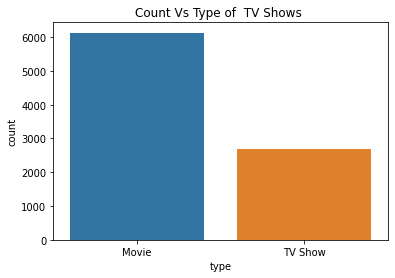

In [ ]:
sns.countplot(x = 'type' , data = df6)
plt.title('Count Vs Type of  TV Shows ')

In [ ]:
s = df6.type.value_counts()[:10].tolist()
s1 = df6.type.value_counts()[:10].index.tolist()

Text(0.5, 1.0, 'Top 10 types with movies and tv shows')

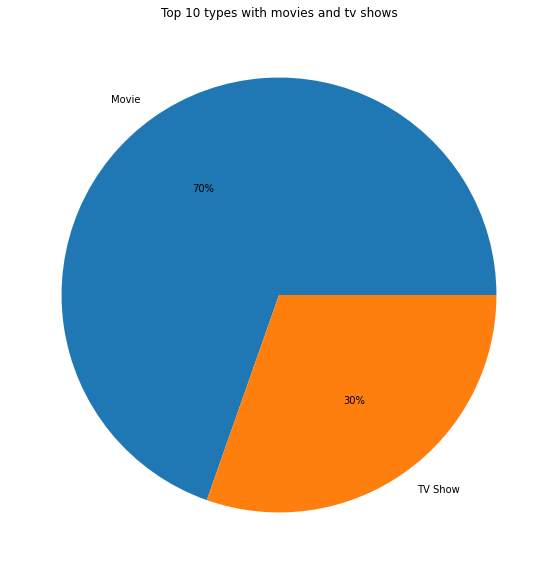

In [ ]:
plt.figure(figsize=(10, 10))
plt.pie(s , labels=s1 , autopct='%1.0f%%'  )
plt.title('Top 10 types with movies and tv shows') 

## **Release year**  

In [ ]:
ii=df6.loc[df6['release_year'] == 2020]
ii.head()

,type,title,country,release_year,duration,A,B,C,D,E
0,Movie,Dick Johnson Is Dead,United States,2020,90 min,Documentaries,International Movies,International Movies,International Movies,Fantasy
16,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,United States,2020,67 min,Documentaries,International Movies,International Movies,International Movies,Fantasy
17,TV Show,Falsa identidad,Mexico,2020,2 Seasons,Crime TV Shows,Spanish-Language TV Shows,TV Dramas,International Movies,Fantasy
32,TV Show,Sex Education,United Kingdom,2020,3 Seasons,British TV Shows,International TV Shows,TV Comedies,International Movies,Fantasy
34,TV Show,Tayo and Little Wizards,United States,2020,1 Season,Kids' TV,International Movies,International Movies,International Movies,Fantasy


In [ ]:
ii.shape

(953, 10)

In [ ]:
c = df6.release_year.value_counts()[:10].tolist()
c1 = df6.release_year.value_counts()[:10].index.tolist()

Text(0.5, 1.0, 'Top 10 types with showes per year')

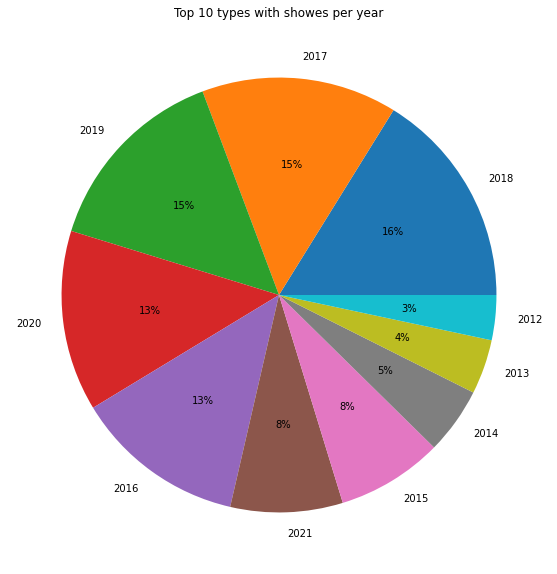

In [ ]:
plt.figure(figsize=(10, 10))
plt.pie(c , labels=c1 , autopct='%1.0f%%'  )
plt.title('Top 10 types with showes per year') 

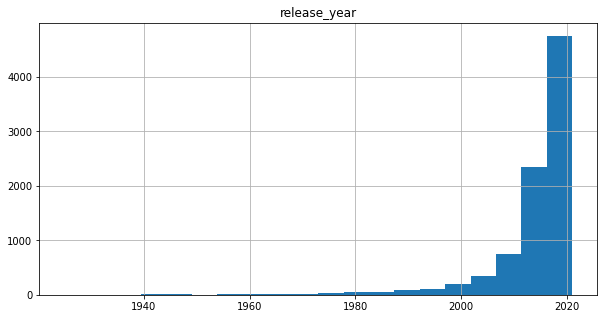

In [ ]:
plt.rcParams["figure.figsize"] = (10, 5)
df6.hist(bins=20)
plt.show()

Text(0.5, 1.0, 'Nomber of shows per year on Netflix ')

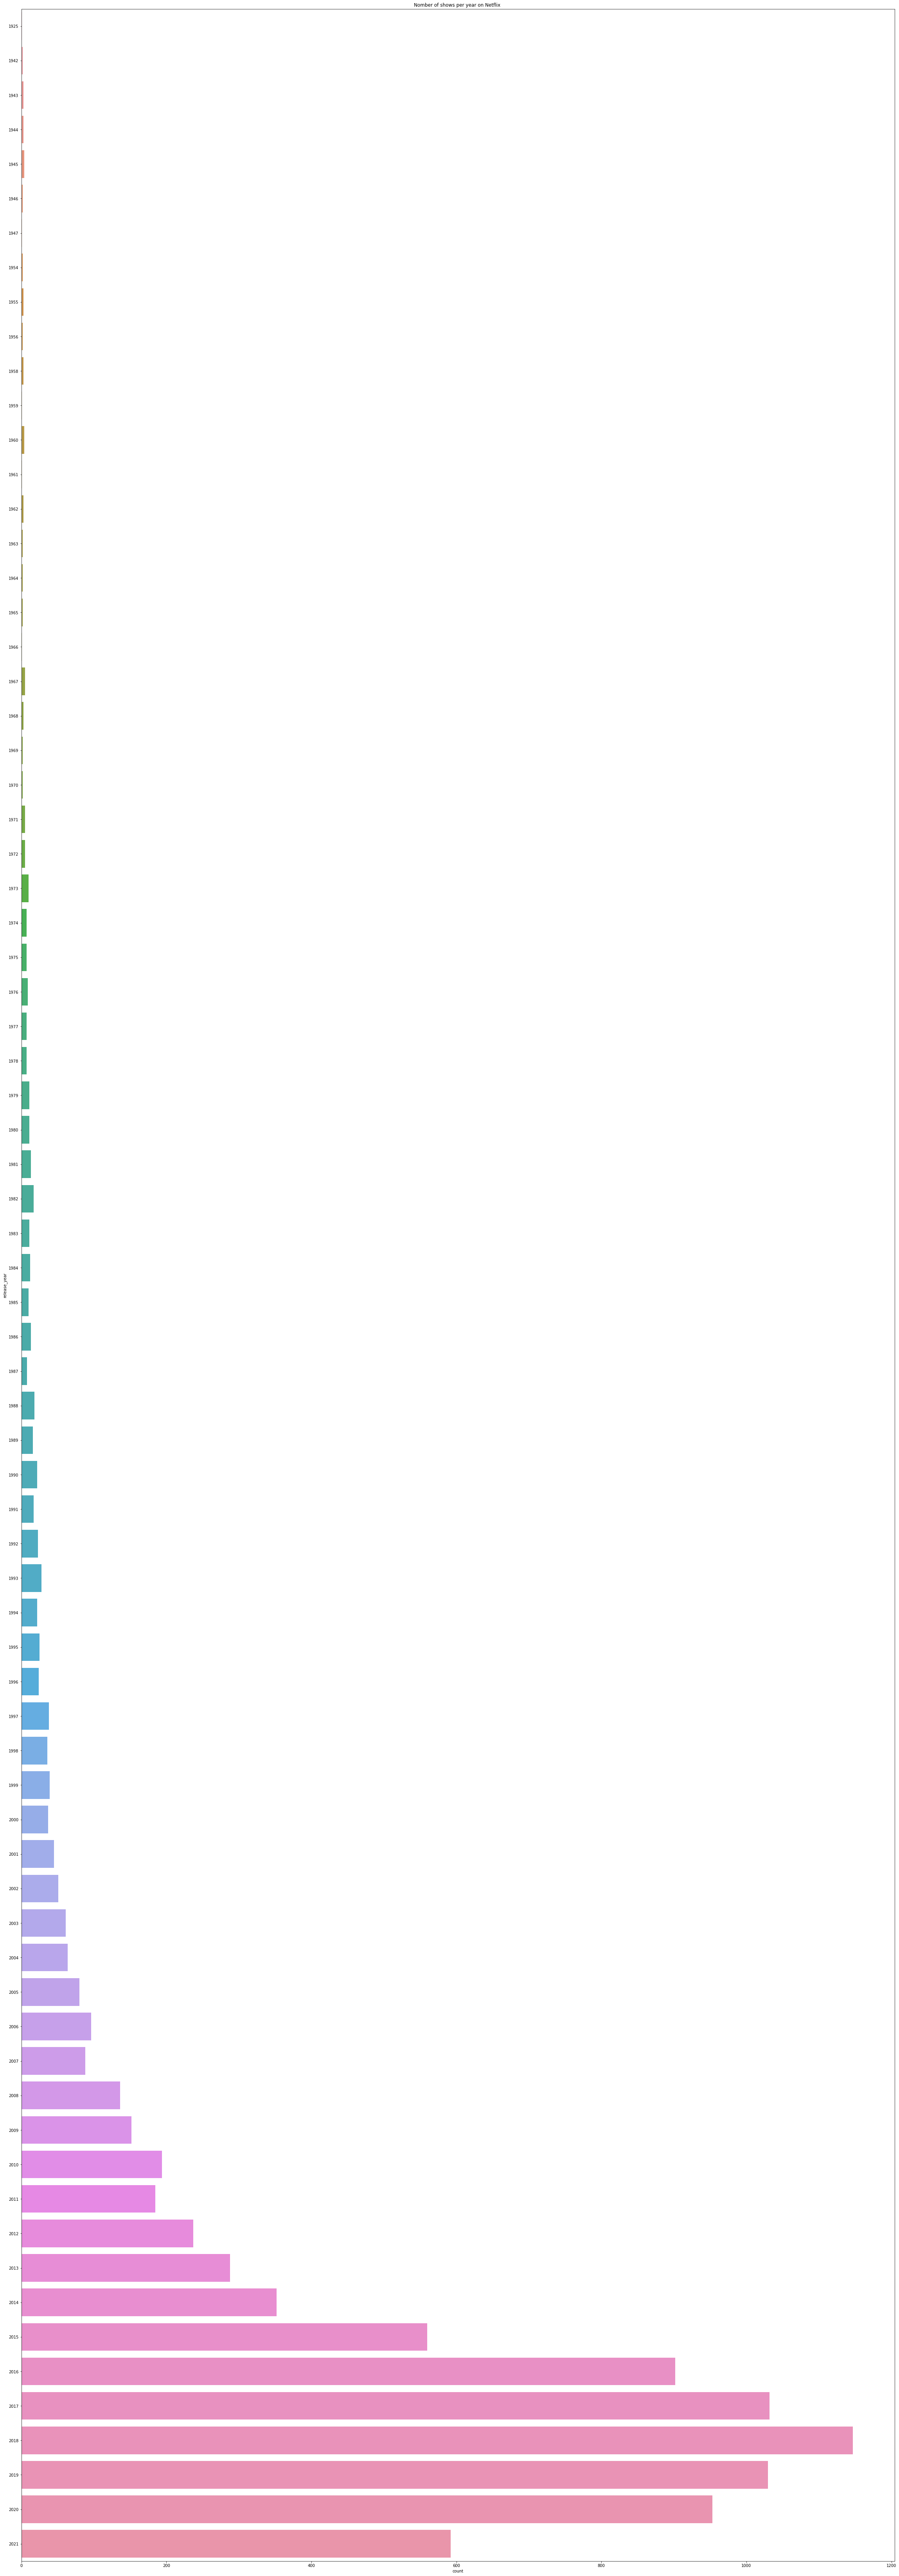

In [ ]:
plt.figure(figsize = (40,120))
sns.countplot(y = 'release_year' , data = df6 )
plt.title('Nomber of shows per year on Netflix ')

## **Duration**

In [ ]:
df.duration.head(20)

0        90 min
1     2 Seasons
2      1 Season
3      1 Season
4     2 Seasons
5      1 Season
6        91 min
7       125 min
8     9 Seasons
9       104 min
10     1 Season
11     1 Season
12      127 min
13       91 min
14     1 Season
15    4 Seasons
16       67 min
17    2 Seasons
18       94 min
19     1 Season
Name: duration, dtype: object

In [ ]:
df6.duration.value_counts(ascending = False)


1 Season     1796
2 Seasons     425
3 Seasons     199
90 min        152
93 min        146
             ... 
273 min         1
167 min         1
9 min           1
189 min         1
201 min         1
Name: duration, Length: 220, dtype: int64

Text(0.5, 1.0, 'duration of Shows on Netflix Vs Count')

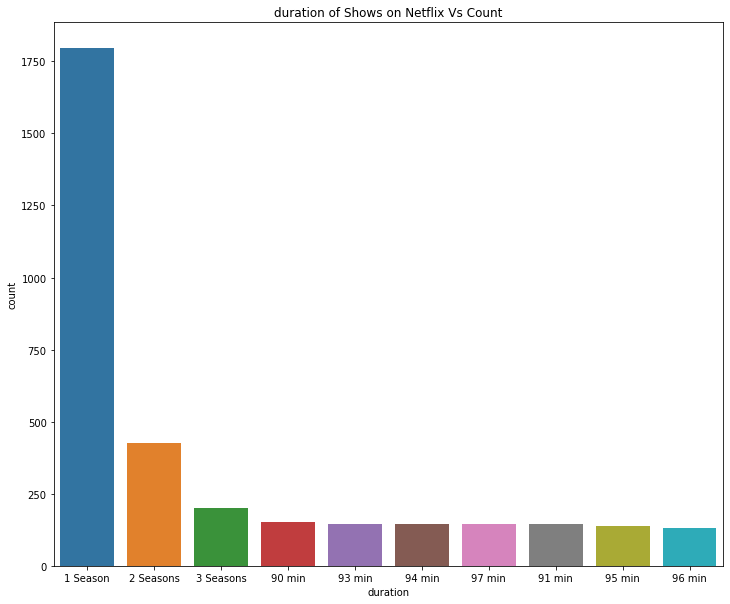

In [ ]:
plt.figure(figsize = (12,10))
sns.countplot(x='duration' ,order = df6['duration'].value_counts().index[0:10],data = df6)
plt.title('duration of Shows on Netflix Vs Count')

## **Country**

Text(0.5, 1.0, 'Top 10 countries in which most movies and TV shows have been released')

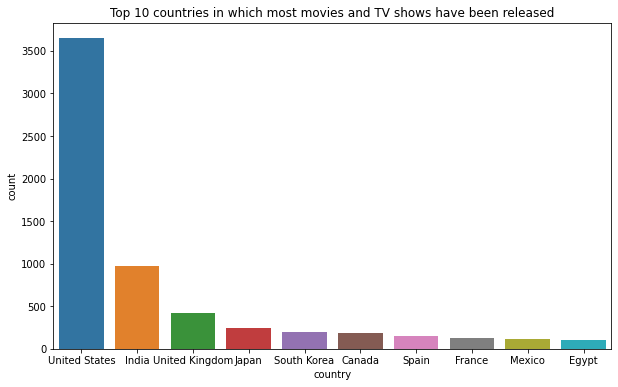

In [ ]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'country' ,order = df6['country'].value_counts().index[:10] , data = df6) 
plt.title('Top 10 countries in which most movies and TV shows have been released')

In [ ]:
values = df6.country.value_counts()[:10].tolist()
labels = df6.country.value_counts()[:10].index.tolist()

Text(0.5, 1.0, 'Top 10 countries with movies and tv shows')

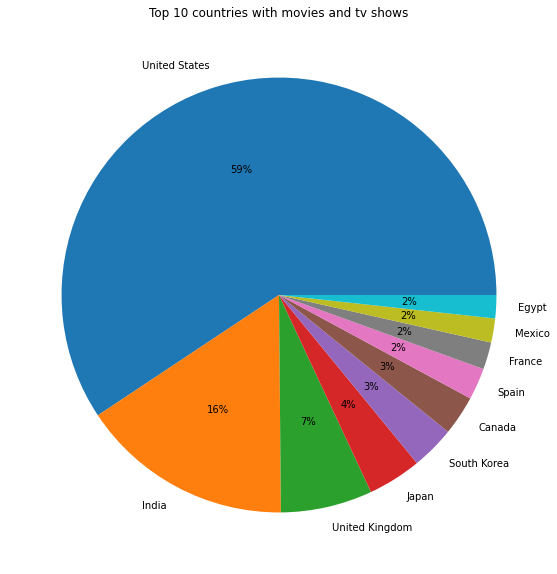

In [ ]:
plt.figure(figsize=(10, 10))
plt.pie(values , labels=labels , autopct='%1.0f%%'  )
plt.title('Top 10 countries with movies and tv shows') 

## **Column A** 

Text(0.5, 1.0, 'Top 10 A categories ')

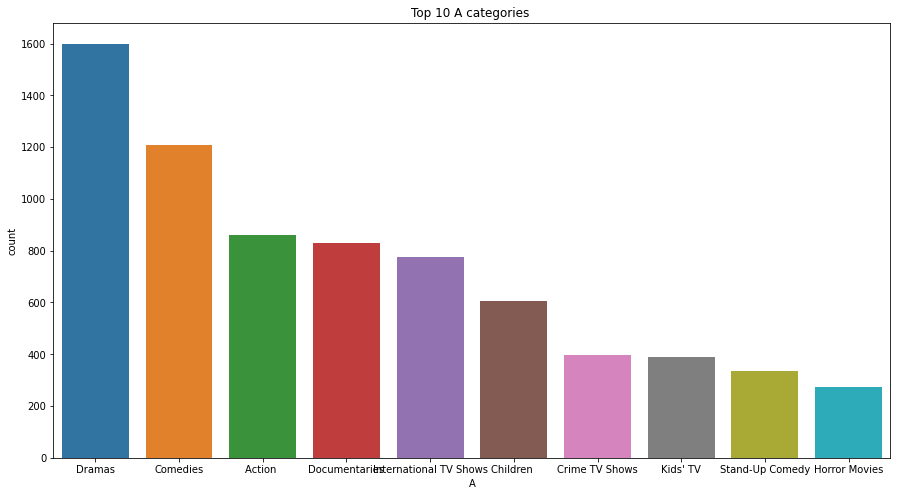

In [ ]:
plt.figure(figsize = (15,8))
sns.countplot(x = 'A' ,order = df6['A'].value_counts().index[:10] , data = df6) 
plt.title('Top 10 A categories ')

Text(0.5, 1.0, 'Top 10 A countries with movies and tv shows')

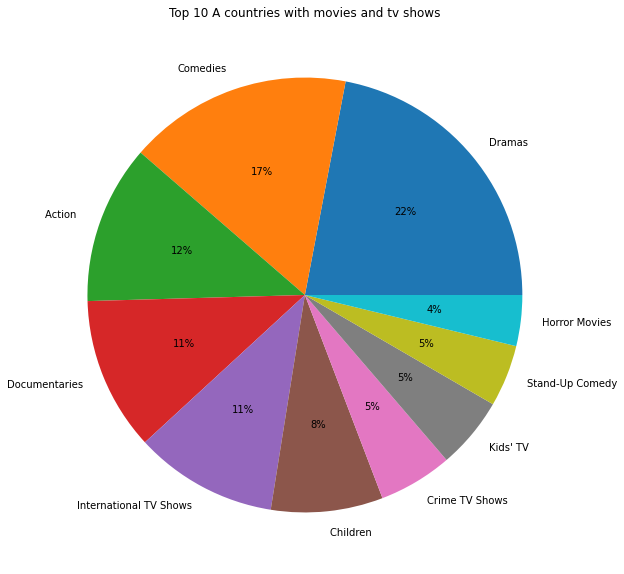

In [ ]:
m = df6.A.value_counts()[:10].tolist()
m1 = df6.A.value_counts()[:10].index.tolist()
plt.figure(figsize=(10, 10))
plt.pie(m , labels=m1 , autopct='%1.0f%%'  )
plt.title('Top 10 A countries with movies and tv shows') 

## **Column B**

Text(0.5, 1.0, 'Top 10 B categories ')

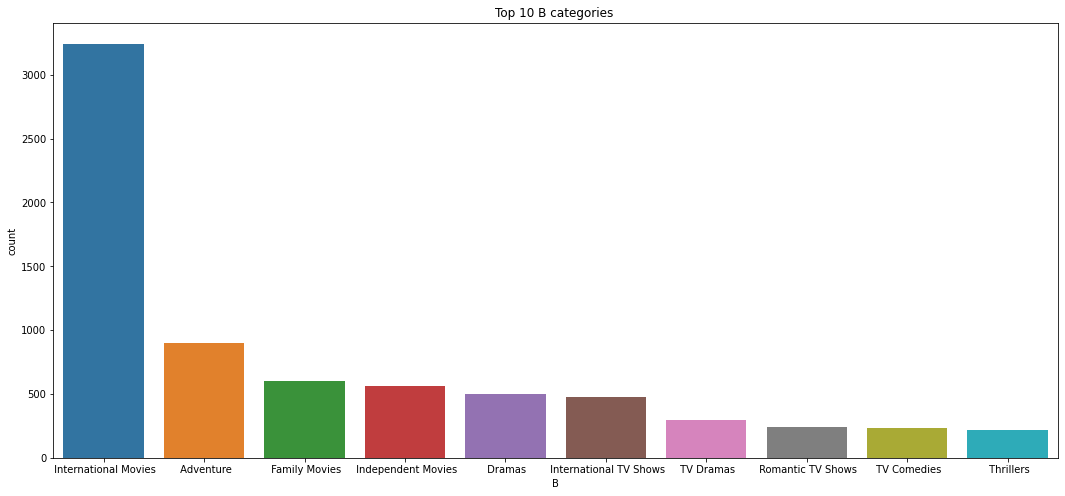

In [ ]:
plt.figure(figsize = (18,8))
sns.countplot(x = 'B' ,order = df6['B'].value_counts().index[:10] , data = df6) 
plt.title('Top 10 B categories ')

Text(0.5, 1.0, 'Top 10 B countries with movies and tv shows')

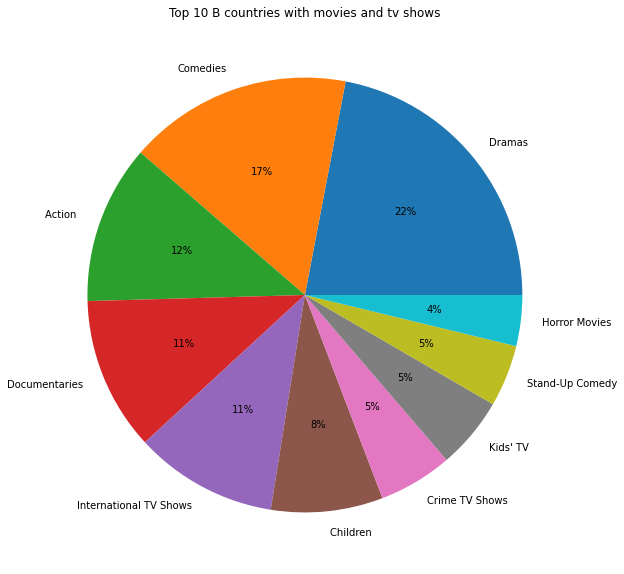

In [ ]:
n = df6.A.value_counts()[:10].tolist()
n1 = df6.A.value_counts()[:10].index.tolist()
plt.figure(figsize=(10, 10))
plt.pie(n , labels=n1 , autopct='%1.0f%%'  )
plt.title('Top 10 B countries with movies and tv shows')

# **Thank you**